# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [2]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = [ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [3]:
'''NLP Libraries'''
import nltk
from nltk import ngrams, FreqDist
from wordcloud import WordCloud, ImageColorGenerator

In [4]:
''' Miscellaneous Libraries'''
from tqdm import tqdm

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Input Data

## Spanish Wikipedia - WIKI_GIFT_ESP Dataset

In [8]:
df_WIKI_GIFT_ESP = pd.read_excel("../Datasets//WIKI_GIFT_ESP.xlsx")

## German Wikipedia - WIKI_GIFT_DE Dataset

In [6]:
df_WIKI_GIFT_DE = pd.read_excel("../Datasets//WIKI_GIFT_DE.xlsx")

## Statistics

In [10]:
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    print("Dataset {}".format(df_name))
    print("\tAverage number of description categories per species: {} ({})".format(np.mean(df[f"WIKI_id_N"]), np.std(df[f"WIKI_id_N"])))

Dataset WIKI_ESP
	Average number of description categories per species: 5.84628217349857 (2.5784105849148498)
Dataset WIKI_DE
	Average number of description categories per species: 8.381562629185614 (3.4749929109263973)


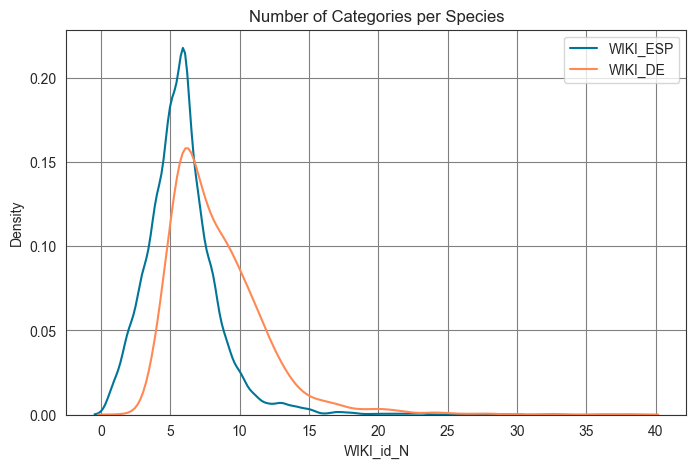

In [11]:
plt.subplots(figsize = (8,5), ncols=1, nrows=1)
plt.title("Number of Categories per Species")
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    sns.kdeplot(df[f"WIKI_id_N"], label = df_name)
plt.legend()
plt.show()

# Description Word Count & Character Count Analysis 

## Description Character Count

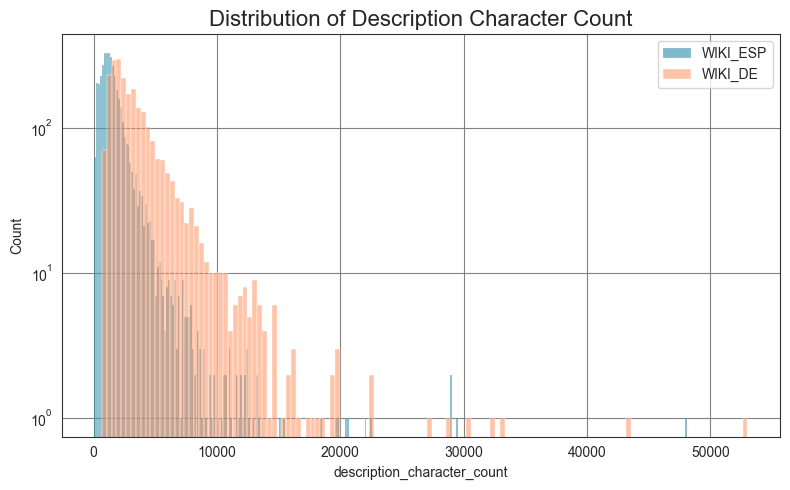

In [12]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
plt.title("Distribution of Description Character Count", fontsize=16)

for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    sns.histplot(df["description_character_count"], alpha = 0.5, label = df_name)

# plt.xscale('log')
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()

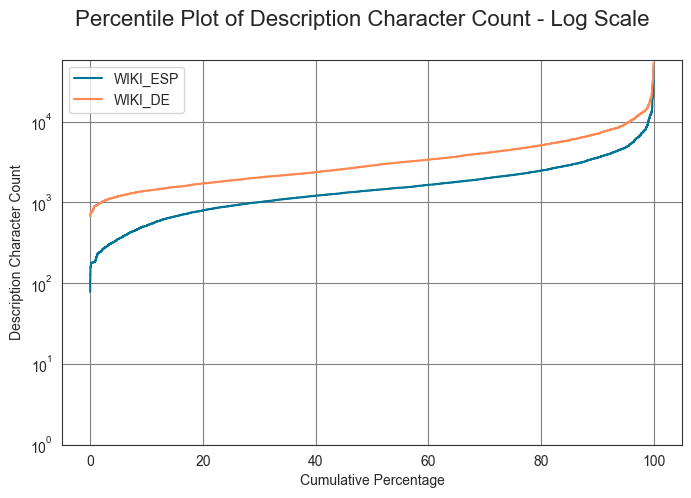

In [13]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
plt.suptitle("Percentile Plot of Description Character Count - Log Scale", fontsize=16)
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    sorted_data = np.sort(df["description_character_count"]) 
    plt.step(100*np.arange(sorted_data.size)/sorted_data.size, sorted_data, label = df_name)

plt.xlabel("Cumulative Percentage")
plt.ylabel("Description Character Count")
plt.yscale("log")
plt.ylim(1, np.max(sorted_data)*1.1)
plt.legend()
plt.show()

## Description Word Count

In [14]:
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    print("Dataset {}".format(df_name))
    print("Number of descriptions with less than 5 words: {}".format(np.round(np.sum(df["description_word_count"]<5)/len(df["description_word_count"]), 2)))

Dataset WIKI_ESP
Number of descriptions with less than 5 words: 0.0
Dataset WIKI_DE
Number of descriptions with less than 5 words: 0.0


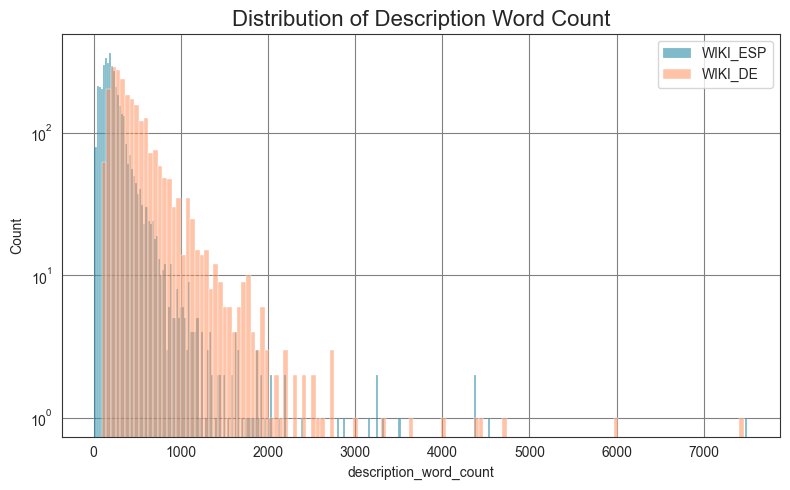

In [15]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
plt.title("Distribution of Description Word Count", fontsize=16)

for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    sns.histplot(df["description_word_count"], alpha = 0.5, label = df_name)

# plt.xscale('log')
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()

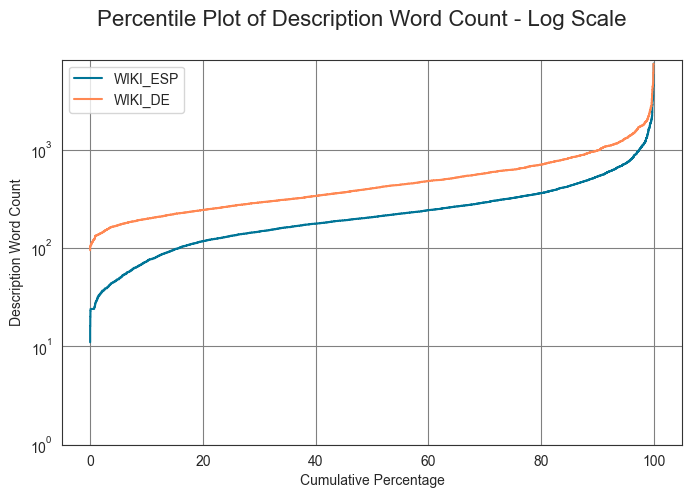

In [16]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
plt.suptitle("Percentile Plot of Description Word Count - Log Scale", fontsize=16)
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    sorted_data = np.sort(df["description_word_count"]) 
    plt.step(100*np.arange(sorted_data.size)/sorted_data.size, sorted_data, label = df_name)

plt.xlabel("Cumulative Percentage")
plt.ylabel("Description Word Count")
plt.yscale("log")
plt.ylim(1, np.max(sorted_data)*1.1)
plt.legend()
plt.show()

# Word Corpus Analysis

In [17]:
description_corpus = dict()
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    description_corpus[df_name] = " ".join(df["BERT_description"].values.astype(str))

In [18]:
word_Freq = dict()
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    word_Freq[df_name] = FreqDist(ngrams(nltk.word_tokenize(description_corpus[df_name]), 1))

In [19]:
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    print("Dataset {}".format(df_name))
    print("\tNumber of Unique Tokens in Corpus: {}".format(len(word_Freq[df_name])))

Dataset WIKI_ESP
	Number of Unique Tokens in Corpus: 79553
Dataset WIKI_DE
	Number of Unique Tokens in Corpus: 83595


## Token Occurrence
 
In the WIKI_ESP dataset 50% of the tokens occur only once and 87% of the tokens occur less than 10 times. (This is probably due to the fact that species names are contained in some descriptions).

In the WIKI_DE dataset 55% of the tokens occur only once and 89% of the tokens occur less than 10 times. (This is probably due to the fact that species names are contained in some descriptions).

WIKI_ESP
1% 1, 2% 1, 3% 1, 4% 1, 5% 1, 6% 1, 7% 1, 8% 1, 9% 1, 10% 1, 
11% 1, 12% 1, 13% 1, 14% 1, 15% 1, 16% 1, 17% 1, 18% 1, 19% 1, 20% 1, 
21% 1, 22% 1, 23% 1, 24% 1, 25% 1, 26% 1, 27% 1, 28% 1, 29% 1, 30% 1, 
31% 1, 32% 1, 33% 1, 34% 1, 35% 1, 36% 1, 37% 1, 38% 1, 39% 1, 40% 1, 
41% 1, 42% 1, 43% 1, 44% 1, 45% 1, 46% 1, 47% 1, 48% 1, 49% 1, 50% 1, 
51% 2, 52% 2, 53% 2, 54% 2, 55% 2, 56% 2, 57% 2, 58% 2, 59% 2, 60% 2, 
61% 2, 62% 2, 63% 2, 64% 2, 65% 2, 66% 3, 67% 3, 68% 3, 69% 3, 70% 3, 
71% 3, 72% 3, 73% 4, 74% 4, 75% 4, 76% 4, 77% 5, 78% 5, 79% 5, 80% 5, 
81% 6, 82% 6, 83% 7, 84% 7, 85% 8, 86% 9, 87% 9, 88% 11, 89% 12, 90% 13, 
91% 15, 92% 17, 93% 20, 94% 24, 95% 30, 96% 38, 97% 51, 98% 78, 99% 152, 100% 81928, 

WIKI_DE
1% 1, 2% 1, 3% 1, 4% 1, 5% 1, 6% 1, 7% 1, 8% 1, 9% 1, 10% 1, 
11% 1, 12% 1, 13% 1, 14% 1, 15% 1, 16% 1, 17% 1, 18% 1, 19% 1, 20% 1, 
21% 1, 22% 1, 23% 1, 24% 1, 25% 1, 26% 1, 27% 1, 28% 1, 29% 1, 30% 1, 
31% 1, 32% 1, 33% 1, 34% 1, 35% 1, 36% 1, 37% 1, 38% 1, 39%

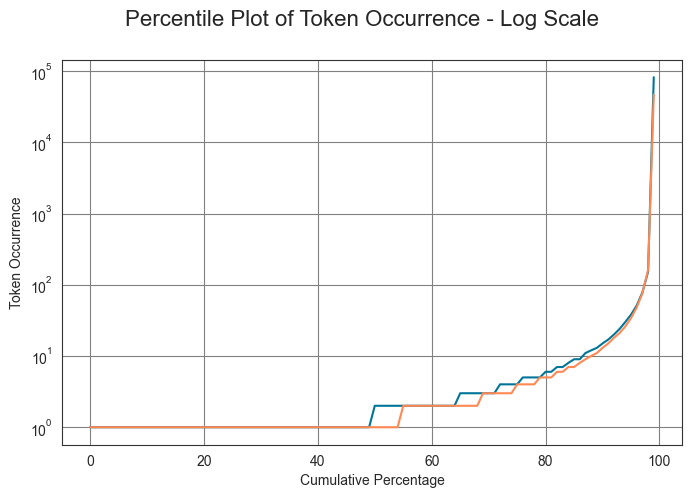

In [20]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
     
for df_name, df in zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE]): 
    print(df_name)
    word_Frequencies = list(word_Freq[df_name].values())
    percentile_data = []
    for percentile in np.arange(1,101,1):
        percentile_data.append(np.percentile(word_Frequencies, percentile))
        print(str(percentile)+"%", int(np.percentile(word_Frequencies, percentile)), end=", ")
        if(percentile%10==0):
            print()
    plt.plot(percentile_data[:])
    print()
    
plt.suptitle("Percentile Plot of Token Occurrence - Log Scale", fontsize=16)
plt.xlabel("Cumulative Percentage")
plt.ylabel("Token Occurrence")
plt.yscale("log")
plt.show()

## Other Information

In [21]:
for i, (df_name, df) in enumerate(zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE])): 
    print("Dataset {}".format(df_name))
    print("\tNumber of descriptions containing measurements (mm, cm, ft, dm): {}".format(np.sum(df["BERT_description"].apply(lambda x: (" mm " in str(x)) or (" cm " in str(x)) or (" dm " in str(x)) or (" m " in str(x)) or (" ft " in str(x))))))

Dataset WIKI_ESP
	Number of descriptions containing measurements (mm, cm, ft, dm): 2409
Dataset WIKI_DE
	Number of descriptions containing measurements (mm, cm, ft, dm): 788


# Trait Analysis

In [22]:
trait_names_cat = ["Growth_form_1", "Epiphyte_1", "Climber_1", "Lifecycle_1", "Life_form_1"]
traits_cat = ["1.2.1", "1.3.1", "1.4.1", "2.1.1", "2.3.1"]

trait_names_num = ["Plant_height_max", "Leaf_length_max", "Leaf_width_max"]
traits_num = ["1.6.2", "4.6.2", "4.7.2"]

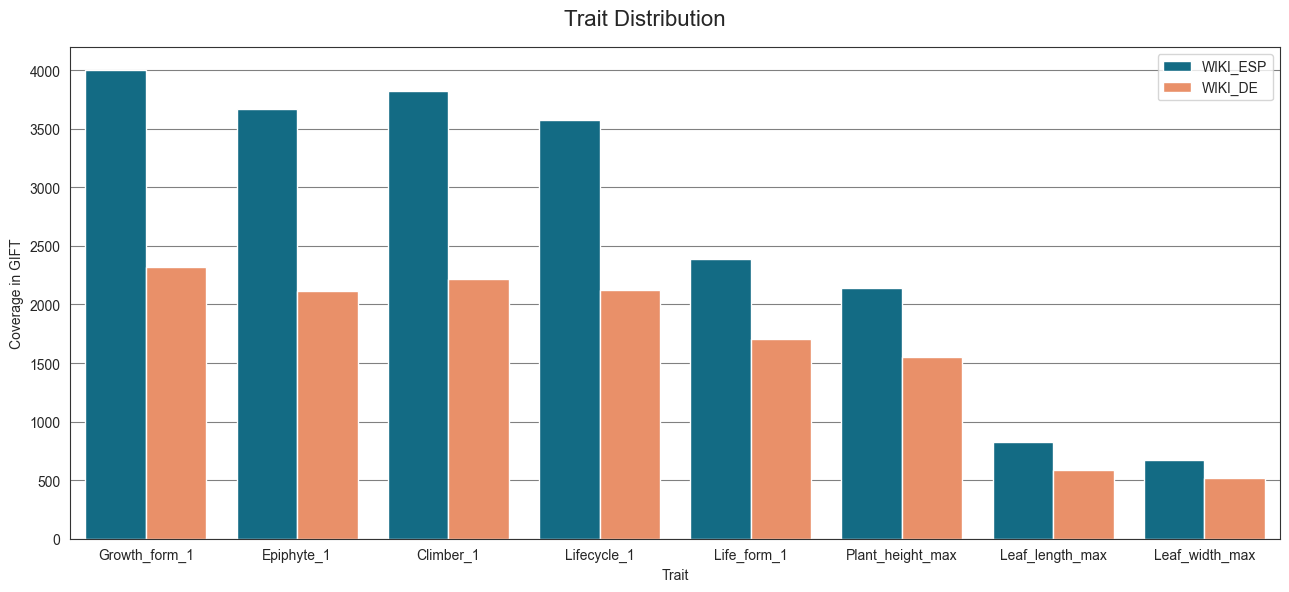

In [23]:
x_values = trait_names_cat + trait_names_num + trait_names_cat + trait_names_num
y_values = [np.sum(df_WIKI_GIFT_ESP[trait].notna()) for trait in traits_cat + traits_num] + [np.sum(df_WIKI_GIFT_DE[trait].notna()) for trait in traits_cat + traits_num]
hue = ["WIKI_ESP"]*8 + ["WIKI_DE"]*8

fig, ax = plt.subplots(figsize=(13,6), nrows = 1)
plt.suptitle("Trait Distribution", fontsize=16)
plt.xlabel("Trait")
plt.ylabel("Coverage in GIFT")
sns.barplot(y = y_values, x = x_values, hue = hue)
plt.tight_layout()
plt.show()

# Categorical Trait Analysis

In [24]:
trait_values_dict = {}
trait_values_dict["1.2.1"] = ["herb", "shrub", "tree"]
trait_values_dict["1.3.1"] = ["obligatory", "terrestrial"]
trait_values_dict["1.4.1"] = ["obligatory", "self-supporting"]
trait_values_dict["2.1.1"] = ["annual", "perennial"]
trait_values_dict["2.3.1"] = ["phanerophyte", "chamaephyte", "hemicryptophyte", "cryptophyte", "therophyte"]

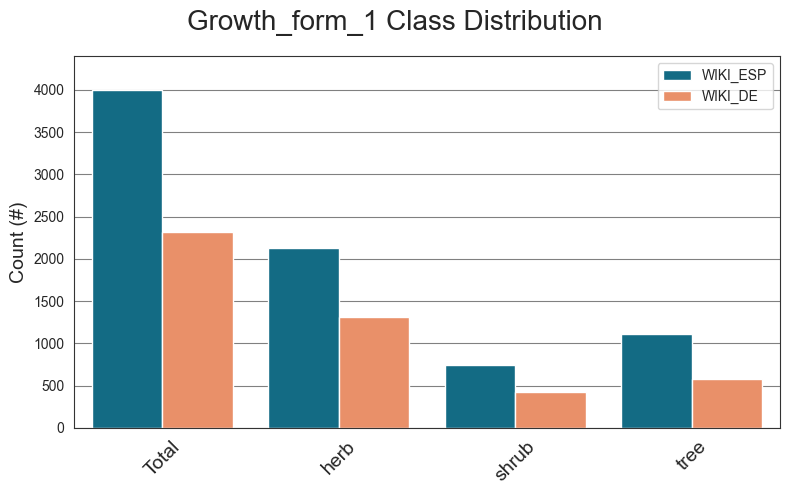

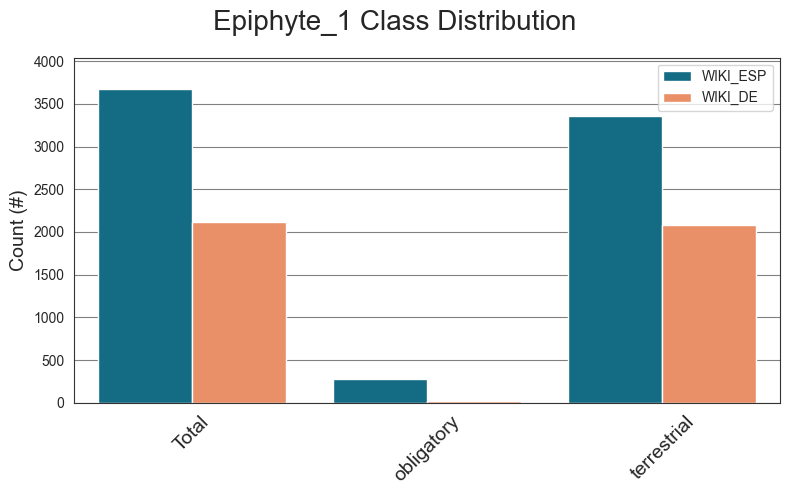

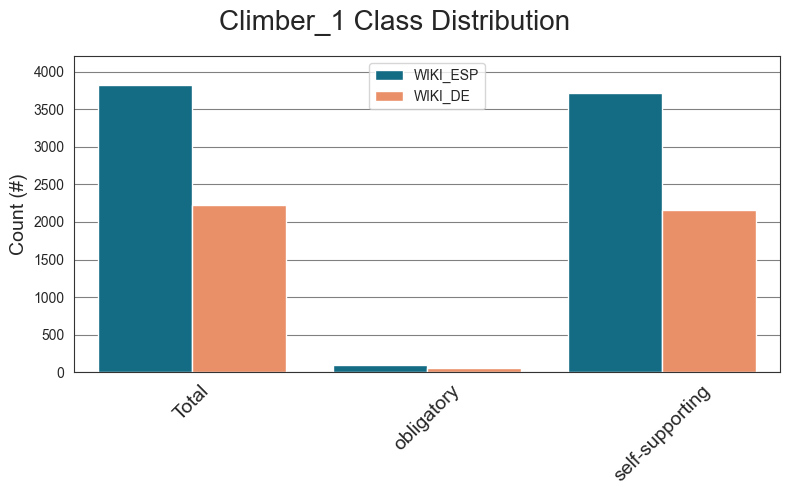

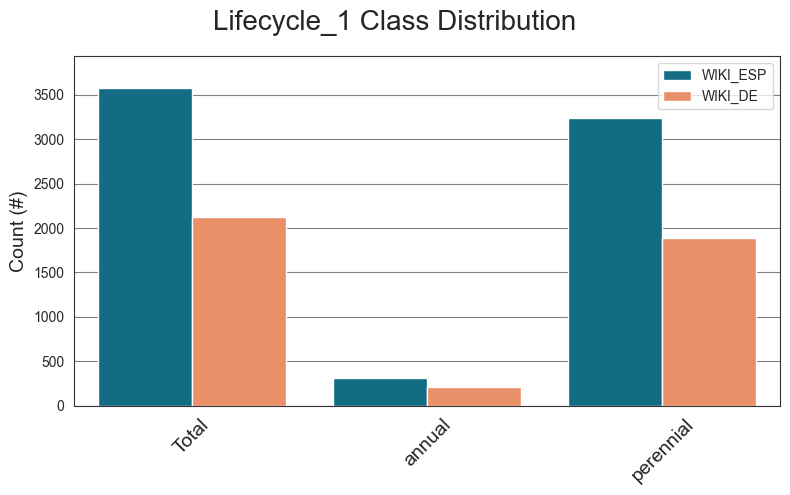

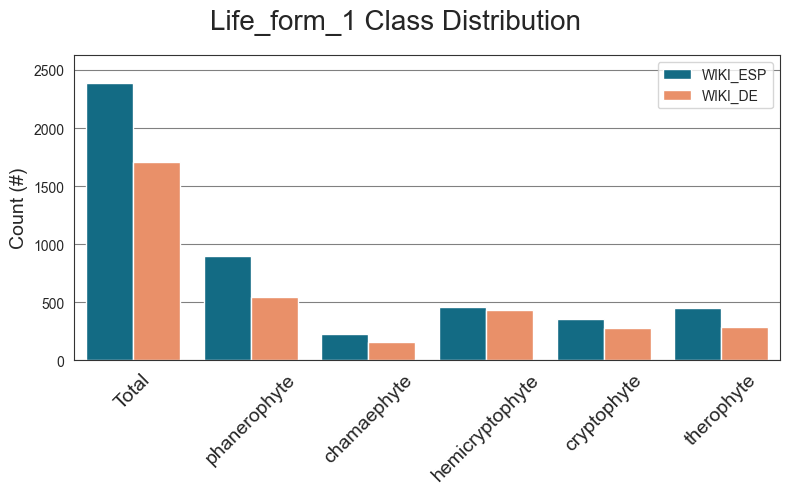

In [26]:
for trait_name, trait_code in zip(trait_names_cat, traits_cat):
    fig, axes  = plt.subplots(figsize=(8,5), nrows = 1)

    x_values = ["Total"] + trait_values_dict[trait_code] + ["Total"] + trait_values_dict[trait_code]
    y_values = [df_WIKI_GIFT_ESP[trait_code].count()] + list(df_WIKI_GIFT_ESP[trait_code].value_counts()[trait_values_dict[trait_code]]) + [df_WIKI_GIFT_DE[trait_code].count()] + list(df_WIKI_GIFT_DE[trait_code].value_counts()[trait_values_dict[trait_code]])
    hue = ["WIKI_ESP"]*(len(x_values)//2) + ["WIKI_DE"]*(len(x_values)//2)
    sns.barplot(y = y_values, x = x_values, hue = hue)
    axes.set_xticklabels(axes.get_xticklabels(), size=14, rotation=45)

    plt.ylim(0, df_WIKI_GIFT_ESP[trait_code].count()*1.1)
    plt.ylabel("Count (#)", size=14)
    plt.suptitle("{} Class Distribution".format(trait_name), size=20)
    plt.tight_layout()
    plt.show()

# Numerical Trait Analysis

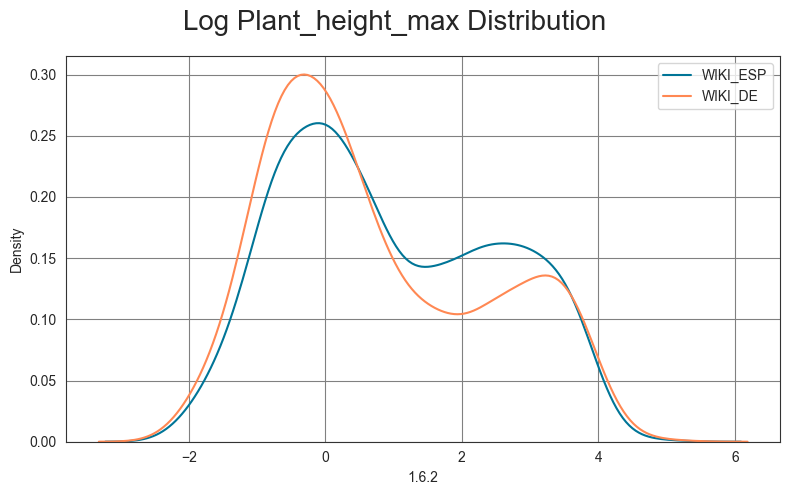

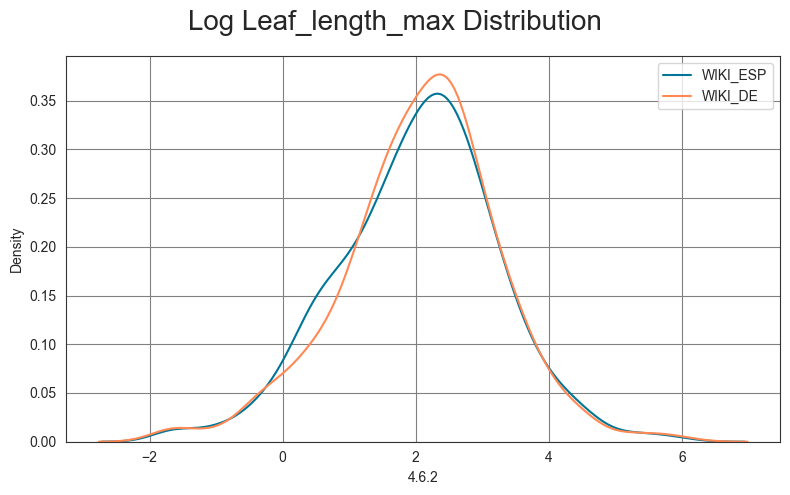

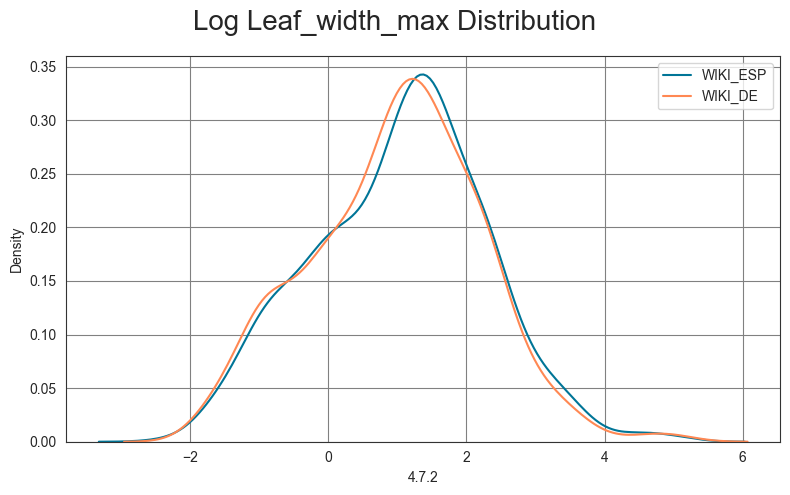

In [27]:
for trait_name, trait_code in zip(trait_names_num, traits_num):
    fig, axes  = plt.subplots(figsize=(8,5), nrows = 1)

    for i, (df_name, df) in enumerate(zip(["WIKI_ESP", "WIKI_DE"], [df_WIKI_GIFT_ESP, df_WIKI_GIFT_DE])):
        sns.kdeplot(np.log(df[df[trait_code].notna()][trait_code]+0.1), label = df_name)

    plt.suptitle("Log {} Distribution".format(trait_name), size=20)
    # plt.xscale("log")
    plt.tight_layout()
    plt.legend()
    plt.show()